In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns
import math
import datetime as dt

In [ ]:
df = pd.read_excel('FULL.xlsx')

In [ ]:
df=pd.get_dummies(df,prefix=['Basin'],columns=['SUBBASIN'])
print(df)

                ISO_TIME       LAT      LON  ...  STORM_DIR  Basin_AS  Basin_BB
0    2002-05-06 03:00:00   9.30004  66.8800  ...        331         1         0
1    2002-05-06 06:00:00   9.96667  66.5000  ...        333         1         0
2    2002-05-06 09:00:00  10.61360  66.2109  ...        337         1         0
3    2002-05-06 12:00:00  11.15000  66.0000  ...        335         1         0
4    2002-05-06 15:00:00  11.44240  65.8147  ...        327         1         0
...                  ...       ...      ...  ...        ...       ...       ...
2848 2019-12-03 21:00:00  13.76820  69.9689  ...          2         1         0
2849 2019-12-04 00:00:00  14.22860  69.8857  ...        333         1         0
2850 2019-12-04 03:00:00  14.65750  69.4944  ...        305         1         0
2851 2019-12-04 06:00:00  14.80000  69.0500  ...        283         1         0
2852 2019-12-04 09:00:00  14.84580  68.6758  ...        275         1         0

[2853 rows x 16 columns]


In [ ]:
df.NEWDELHI_GRADE.unique()

array(['D', 'DD', 'CS', 'SCS', 'VSCS', 'SUCS'], dtype=object)

In [ ]:
temp_dict={'D': 1,
           'DD': 2,
           'CS': 3,
           'SCS': 4,
           'VSCS': 5,
           'SUCS': 6}
df['GRADE']=df.NEWDELHI_GRADE.map(temp_dict)
print(df)

                ISO_TIME       LAT      LON  ...  Basin_AS  Basin_BB  GRADE
0    2002-05-06 03:00:00   9.30004  66.8800  ...         1         0      1
1    2002-05-06 06:00:00   9.96667  66.5000  ...         1         0      1
2    2002-05-06 09:00:00  10.61360  66.2109  ...         1         0      1
3    2002-05-06 12:00:00  11.15000  66.0000  ...         1         0      1
4    2002-05-06 15:00:00  11.44240  65.8147  ...         1         0      1
...                  ...       ...      ...  ...       ...       ...    ...
2848 2019-12-03 21:00:00  13.76820  69.9689  ...         1         0      1
2849 2019-12-04 00:00:00  14.22860  69.8857  ...         1         0      2
2850 2019-12-04 03:00:00  14.65750  69.4944  ...         1         0      2
2851 2019-12-04 06:00:00  14.80000  69.0500  ...         1         0      2
2852 2019-12-04 09:00:00  14.84580  68.6758  ...         1         0      2

[2853 rows x 17 columns]


In [ ]:
df=df.drop(columns='NEWDELHI_GRADE')
times=df['ISO_TIME']
print(times)

0      2002-05-06 03:00:00
1      2002-05-06 06:00:00
2      2002-05-06 09:00:00
3      2002-05-06 12:00:00
4      2002-05-06 15:00:00
               ...        
2848   2019-12-03 21:00:00
2849   2019-12-04 00:00:00
2850   2019-12-04 03:00:00
2851   2019-12-04 06:00:00
2852   2019-12-04 09:00:00
Name: ISO_TIME, Length: 2853, dtype: datetime64[ns]


In [ ]:
df['month'] = df['ISO_TIME'].dt.month
print(df)

                ISO_TIME       LAT      LON  ...  Basin_BB  GRADE  month
0    2002-05-06 03:00:00   9.30004  66.8800  ...         0      1      5
1    2002-05-06 06:00:00   9.96667  66.5000  ...         0      1      5
2    2002-05-06 09:00:00  10.61360  66.2109  ...         0      1      5
3    2002-05-06 12:00:00  11.15000  66.0000  ...         0      1      5
4    2002-05-06 15:00:00  11.44240  65.8147  ...         0      1      5
...                  ...       ...      ...  ...       ...    ...    ...
2848 2019-12-03 21:00:00  13.76820  69.9689  ...         0      1     12
2849 2019-12-04 00:00:00  14.22860  69.8857  ...         0      2     12
2850 2019-12-04 03:00:00  14.65750  69.4944  ...         0      2     12
2851 2019-12-04 06:00:00  14.80000  69.0500  ...         0      2     12
2852 2019-12-04 09:00:00  14.84580  68.6758  ...         0      2     12

[2853 rows x 17 columns]


In [ ]:
df['month'].value_counts()

11    659
10    601
12    494
5     461
6     266
4     130
9     117
7      75
8      30
1      20
Name: month, dtype: int64

In [ ]:
df=df.drop(columns='ISO_TIME')

In [ ]:
print(df)

           LAT      LON  WMO_WIND  WMO_PRES  ...  Basin_AS  Basin_BB  GRADE  month
0      9.30004  66.8800        25      1002  ...         1         0      1      5
1      9.96667  66.5000        25      1002  ...         1         0      1      5
2     10.61360  66.2109        25      1002  ...         1         0      1      5
3     11.15000  66.0000        25      1000  ...         1         0      1      5
4     11.44240  65.8147        25      1000  ...         1         0      1      5
...        ...      ...       ...       ...  ...       ...       ...    ...    ...
2848  13.76820  69.9689        25      1002  ...         1         0      1     12
2849  14.22860  69.8857        30      1000  ...         1         0      2     12
2850  14.65750  69.4944        30      1000  ...         1         0      2     12
2851  14.80000  69.0500        30      1000  ...         1         0      2     12
2852  14.84580  68.6758        30      1000  ...         1         0      2     12

[28

In [ ]:
lat=df['LAT']
lon=df['LON']

In [ ]:
df=df.drop(columns='LAT')
df=df.drop(columns='LON')

In [ ]:
df.insert(0,'LON',lon)
df.insert(0,'LAT',lat)
print(df)

           LAT      LON  WMO_WIND  WMO_PRES  ...  Basin_AS  Basin_BB  GRADE  month
0      9.30004  66.8800        25      1002  ...         1         0      1      5
1      9.96667  66.5000        25      1002  ...         1         0      1      5
2     10.61360  66.2109        25      1002  ...         1         0      1      5
3     11.15000  66.0000        25      1000  ...         1         0      1      5
4     11.44240  65.8147        25      1000  ...         1         0      1      5
...        ...      ...       ...       ...  ...       ...       ...    ...    ...
2848  13.76820  69.9689        25      1002  ...         1         0      1     12
2849  14.22860  69.8857        30      1000  ...         1         0      2     12
2850  14.65750  69.4944        30      1000  ...         1         0      2     12
2851  14.80000  69.0500        30      1000  ...         1         0      2     12
2852  14.84580  68.6758        30      1000  ...         1         0      2     12

[28

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df)
scaled_df = scaler.transform(df)


In [ ]:
print(scaled_df)

[[-1.18156901 -0.8963839  -0.83097862 ... -1.27746578 -1.27429237
  -1.40195113]
 [-1.03431845 -0.92766319 -0.83097862 ... -1.27746578 -1.27429237
  -1.40195113]
 [-0.89141939 -0.95146015 -0.83097862 ... -1.27746578 -1.27429237
  -1.40195113]
 ...
 [ 0.00182953 -0.68118234 -0.60231964 ... -1.27746578 -0.55079861
   1.10215101]
 [ 0.03330607 -0.71776265 -0.60231964 ... -1.27746578 -0.55079861
   1.10215101]
 [ 0.04342274 -0.74856453 -0.60231964 ... -1.27746578 -0.55079861
   1.10215101]]


In [ ]:
trainX1 = []
trainY1 = []

n_future = 1   
n_past = 8     

for i in range(n_past, len(scaled_df) - n_future +1):
    trainX1.append(scaled_df[i - n_past:i, 0:scaled_df.shape[1]])
    trainY1.append(scaled_df[i + n_future - 1:i + n_future, 0])

trainX1, trainY1 = np.array(trainX1), np.array(trainY1)


In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX1.shape[1], trainX1.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY1.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()


# fit model
history = model.fit(trainX1, trainY1, epochs=25, batch_size=32, validation_split=0.1, verbose=1)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8, 64)             20736     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
80/80 [==============================] - 20s 19ms/step - loss: 0.5976 - val_loss: 0.2478
Epoch 2/25
80/80 [==============================] - 0s 5ms/step - loss: 0.1841 - val_loss: 0.1549
Epoch 3/25
80/80 [==============================] - 

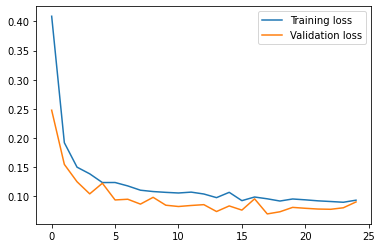

In [ ]:
 plt.plot(history.history['loss'], label='Training loss')
 plt.plot(history.history['val_loss'], label='Validation loss')
 plt.legend()

In [ ]:
n_future=8
forecast_period_dates = pd.date_range(list(times)[-1], periods=n_future, freq='1d').tolist()

forecast = model.predict(trainX1[-n_future:]) #forecast 

forecast_copies = np.repeat(forecast, df.shape[1], axis=-1)
y_pred_future1 = scaler.inverse_transform(forecast_copies)[:,0]

In [ ]:
print(y_pred_future1)

[ 7.3874006  7.350954   7.300813  10.61067   11.765335  13.182278
 13.90376   14.344683 ]


In [ ]:
df=df.drop(columns='LAT')
df=df.drop(columns='LON')
df.insert(0,'LAT',lat)
df.insert(0,'LON',lon)
print(df)

          LON       LAT  WMO_WIND  WMO_PRES  ...  Basin_AS  Basin_BB  GRADE  month
0     66.8800   9.30004        25      1002  ...         1         0      1      5
1     66.5000   9.96667        25      1002  ...         1         0      1      5
2     66.2109  10.61360        25      1002  ...         1         0      1      5
3     66.0000  11.15000        25      1000  ...         1         0      1      5
4     65.8147  11.44240        25      1000  ...         1         0      1      5
...       ...       ...       ...       ...  ...       ...       ...    ...    ...
2848  69.9689  13.76820        25      1002  ...         1         0      1     12
2849  69.8857  14.22860        30      1000  ...         1         0      2     12
2850  69.4944  14.65750        30      1000  ...         1         0      2     12
2851  69.0500  14.80000        30      1000  ...         1         0      2     12
2852  68.6758  14.84580        30      1000  ...         1         0      2     12

[28

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(df)
scaled_df = scaler.transform(df)

In [ ]:
trainX2 = []
trainY2 = []

n_future = 1   
n_past = 8     

for i in range(n_past, len(scaled_df) - n_future +1):
    trainX2.append(scaled_df[i - n_past:i, 0:scaled_df.shape[1]])
    trainY2.append(scaled_df[i + n_future - 1:i + n_future, 0])

trainX2, trainY2 = np.array(trainX2), np.array(trainY2)

model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX2.shape[1], trainX2.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY2.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()



history = model.fit(trainX2, trainY2, epochs=25, batch_size=32, validation_split=0.1, verbose=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 8, 64)             20736     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 33,185
Trainable params: 33,185
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
80/80 [==============================] - 3s 15ms/step - loss: 0.5006 - val_loss: 0.1722
Epoch 2/25
80/80 [==============================] - 0s 5ms/step - loss: 0.1808 - val_loss: 0.1012
Epoch 3/25
80/80 [==============================] -

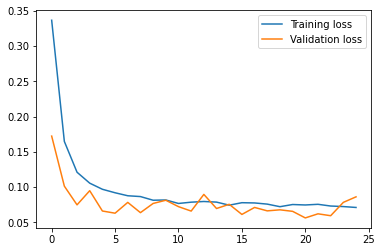

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
n_future=8 
forecast_period_dates = pd.date_range(list(times)[-1], periods=n_future, freq='1d').tolist()
forecast = model.predict(trainX1[-n_future:]) 
forecast_copies = np.repeat(forecast, df.shape[1], axis=-1) 
y_pred_future2 = scaler.inverse_transform(forecast_copies)[:,0] 
print(y_pred_future2)

[61.152134 61.058136 61.246593 71.86235  74.562805 74.33178  75.12869
 75.47594 ]


In [ ]:
y_pred_future1=np.reshape(y_pred_future1,(len(y_pred_future1),1))
y_pred_future2=np.reshape(y_pred_future2,(len(y_pred_future2),1))
output=np.concatenate((y_pred_future1,y_pred_future2),axis=1)
print(output)

[[ 7.3874006 61.152134 ]
 [ 7.350954  61.058136 ]
 [ 7.300813  61.246593 ]
 [10.61067   71.86235  ]
 [11.765335  74.562805 ]
 [13.182278  74.33178  ]
 [13.90376   75.12869  ]
 [14.344683  75.47594  ]]


In [ ]:
 lats=[14.85,14.917,15,15.059,15.157,15.357,15.64]
 lons=[68.4,68.295,68.25,68.188,68.014,67.63,67.2]
 lats=np.array(lats)
 lons=np.array(lons)
 print(lats)

[14.85  14.917 15.    15.059 15.157 15.357 15.64 ]


In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
     - 133.1 MB 441 kB/s
     |████████████████████████████████| 6.6 MB 7.4 MB/s 
     |████████████████████████████████| 219 kB 67.5 MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759601 sha256=862dc2008e068c22f189a922e276b4792d5831c72a738c14f709e7d4382d9511
  Stored in directory: /tmp/pip-ephem-wheel-cache-7zxrh4p4/wheels/98/1a/9d/de6aa4dee52d726996be77bb4a65cf03865288bfc35e5b24d8
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any

# **Real Cyclone Track** 

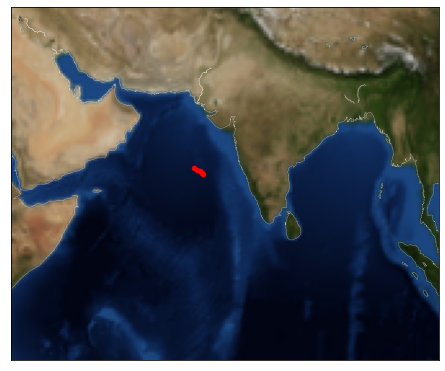

In [ ]:
fig = plt.gcf()
fig.set_size_inches(8, 6.5)

m = Basemap(projection='merc', \
            llcrnrlat=-10.4858, urcrnrlat=35.365, \
            llcrnrlon=42.1158, urcrnrlon=100.7177, \
            lat_ts=20, \
            resolution='l')

m.bluemarble(scale=0.2)   
m.drawcoastlines(color='white', linewidth=0.2) 

x1, y1 = m(lons, lats)  # transform coordinates
plt.scatter(x1, y1, 20, marker='o', color='Red') 

# **Predicted Track**

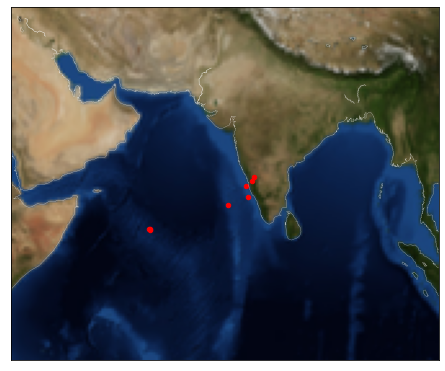

In [ ]:
fig = plt.gcf()
fig.set_size_inches(8, 6.5)

m = Basemap(projection='merc', \
            llcrnrlat=-10.4858, urcrnrlat=35.365, \
            llcrnrlon=42.1158, urcrnrlon=100.7177, \
            lat_ts=20, \
            resolution='l')

m.bluemarble(scale=0.2) 
m.drawcoastlines(color='white', linewidth=0.2) 

x, y = m(y_pred_future2, y_pred_future1)  
plt.scatter(x, y, 20, marker='o', color='Red') 
plt.show()